# Dimension reduction for samples dataset

In [9]:
import numpy as np
import pandas as pd 
import pickle
from sklearn.decomposition import IncrementalPCA
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def load_split_data():
    print("log....Loading the data" )
    with open('labels_data.pickle', 'rb') as handle:
        labelsData = pickle.load(handle)
    with open('samples_data.pickle', 'rb') as handle:
        samplesData = pickle.load(handle)
    
    #samplesDataReduced = pca_reduction(200, samplesData)
    
    #create one df for shuffel
    allData = pd.DataFrame(
        {'samples_data': samplesData,
         'labels_data': labelsData
        })
    #shuffel the data
    allData = allData.sample(frac=1).reset_index(drop=True)

    #separate the data to samples and lables again
    X = allData.samples_data
    y = allData.labels_data
    
    #plot data sample for comparing after
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(X[0])
    plt.show()

    #flatten the samples
    flattendX = []
    for sample in X:
        flattendX.append(sample.flatten()) 

    # test_size: what proportion of original data is used for test set
    train_data, test_data, train_lbl, test_lbl = train_test_split(
        flattendX, y, test_size=1/7.0, random_state=0)

    train_data = np.float32(np.asarray(train_data))
    test_data = np.float32(np.asarray(test_data))
    train_lbl = np.int32(np.asarray(train_lbl))
    test_lbl = np.int32(np.asarray(test_lbl))
    print("log....Done prepering the data" )
    return train_data, test_data, train_lbl, test_lbl

log....Loading the data


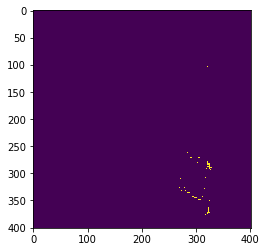

log....Done prepering the data


In [3]:
train_data, test_data, train_lbl, test_lbl = load_split_data()

In [4]:
def standardize_data(train_data, test_data):
    #Standardize the Data
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(train_data)
    # Apply transform to both the training set and the test set.
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)
    
    return train_data, test_data

In [5]:
def pca_transform(train_data, test_data):
    # Make an instance of the Model
    pca = PCA(.95)
    
    #Apply the mapping (transform) to both the training set and the test set
    pca.fit(train_data)
    
    train_data = pca.transform(train_data)
    test_data = pca.transform(test_data)
    
    return train_data, test_data

In [6]:
def data_padding(data):
    #Add Padding to the samples to be on size 3600
    data_resized_list = []
    total_pad_to_add = 3600 - data.shape[1]
    pad_to_each_axes = total_pad_to_add/2
    x_axis = math.floor(pad_to_each_axes)
    y_axis = math.ceil(pad_to_each_axes)
    for sample in data:
        data_resized_list.append(np.pad(sample, (x_axis,y_axis), 'constant', constant_values=(0, 0)))

In [7]:
train_data.shape

(4710, 160801)

In [10]:
#standardize
train_data, test_data = standardize_data(train_data, test_data)

In [ ]:
#pca
train_data, test_data = pca_transform(train_data, test_data)

In [ ]:
#padding
train_data_list = data_padding(train_data)
test_data_list = data_padding(test_data)

## Standardize the Data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)
# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

## Import and Apply PCA

In [6]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

## Apply the mapping (transform) to both the training set and the test set

In [7]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [27]:
train_data.shape[1]

3535

In [26]:
type(train_data)

numpy.ndarray

## Add Padding to the samples to be on size 3600

In [34]:
train_data_resize_list = []
total_pad_to_add = 3600 - train_data.shape[1]
pad_to_each_axes = total_pad_to_add/2
x_axis = math.floor(pad_to_each_axes)
y_axis = math.ceil(pad_to_each_axes)
for sample in train_data:
    train_data_resize_list.append(np.pad(sample, (x_axis,y_axis), 'constant', constant_values=(0, 0)))
    

In [35]:
np.float32(np.asarray(train_data_resize_list)).shape

(4710, 3600)

In [40]:
aa = train_data_resize_list[100].reshape(60,60)

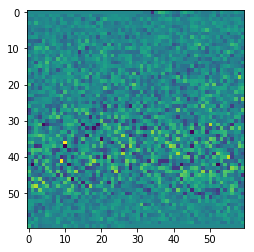

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(aa)
plt.show()